<a href="https://colab.research.google.com/github/joaovictordds/Modelo_Liberacao_Credito/blob/main/credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LIBERAÇÃO DE NOVOS CRÉDITOS AOS CLIENTES**

### Sobre o projeto

Um escritório contábil, em nome de uma plataforma online de crédito da Alemanha nos contratou para fazer algumas análises e criar um modelo que identifica possíveis fraudadores.

Foi disponibilizado uma pequena amostra dos dados dos clientes porém, heterogênea o suficiente para traçar os perfis, as estratégias as análises e os modelos de detecção de fraude.

Tarefas:

* Realizar uma análise dos dados disponibilizados.
* Preparar os dados para geração de modelos de ML.
* Elaborar um algoritmo para proceder na liberação ou não de um novo empréstimo.


### 1. IMPORTAÇÃO DAS BIBLIOTECAS E DOS DADOS

In [ ]:
# Importação dos dados
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.set_option('display.max_columns', 21) # Codigo para mostrar todas as colunas do dataset.
dados = pd.read_csv('https://raw.githubusercontent.com/joaovictordds/Modelo_de_Liberacao-Credito-II/main/german.csv')
dados.sample(3)

,conta,duração,historico,motivo,quantia,poupança,emprego,taxa,status,garantia,residencia,propriedades,idade,financiamentos,moradia,creditos,trabalho,dependentes,telefone,estrangeiro,pagador
286,negativo,48,pagamento em dia,carro usado,4788,<100,"[4,7) anos",4,masculino/solteiro,nenhum,3,seguro de vida,26,nenhum,própria,1,nível 2,2,não,não,bom
678,negativo,24,pagamento em dia,radio/televisão,2384,<100,> 7 anos,4,masculino/solteiro,nenhum,4,imobiliario,64,bancos,alugada,1,nível 1,1,não,não,bom
78,sem conta,54,primeira vez,carro usado,9436,sem conta,"[1,4) anos",2,masculino/solteiro,nenhum,2,seguro de vida,39,nenhum,própria,1,nível 1,2,não,não,bom


### 2. ANALISE EXPLORATÓRIA

#### 2.1 Acesso ao relátorio simplificado das variáveis

In [ ]:
# Breve análise de dados automática
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 20.6 MB/s eta 0:00:00


In [ ]:
da = dados
da['pagador'] = da['pagador'].replace(['bom','mau'],[1,0])

In [ ]:
import sweetviz as sv
eda= sv.analyze(da, target_feat='pagador')
eda.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### 2.2 ANÁLISE EXPLORATÓRIA DOS DADOS

### 3. PRÉ PROCESSAMENTO

In [ ]:
dados.sample(5)

,conta,duração,historico,motivo,quantia,poupança,emprego,taxa,status,garantia,residencia,propriedades,idade,financiamentos,moradia,creditos,trabalho,dependentes,telefone,estrangeiro,pagador
683,sem conta,24,conta crítica,radio/televisão,5103,<100,< 1 ano,3,masculino/casado,nenhum,3,sem propriedades,47,nenhum,de graça,3,nível 2,1,sim,não,bom
238,sem conta,12,conta crítica,radio/televisão,1291,<100,"[1,4) anos",4,feminino/divorciado,nenhum,2,seguro de vida,35,nenhum,própria,2,nível 2,1,não,não,bom
776,sem conta,36,conta crítica,carro novo,3535,<100,"[4,7) anos",4,masculino/solteiro,nenhum,4,carro,37,nenhum,própria,2,nível 2,1,sim,não,bom
875,[0-200),11,conta crítica,carro novo,1322,>1000,"[1,4) anos",4,feminino/divorciado,nenhum,4,carro,40,nenhum,própria,2,nível 2,1,não,não,bom
921,sem conta,48,já atrasou pagamentos,radio/televisão,12749,[500-1000),"[4,7) anos",4,masculino/solteiro,nenhum,1,carro,37,nenhum,própria,1,nível 3,1,sim,não,bom


In [ ]:
dados['financiamentos'].value_counts()

nenhum    814
bancos    139
lojas      47
Name: financiamentos, dtype: int64

In [ ]:
dados['taxa'].value_counts()

4    476
2    231
3    157
1    136
Name: taxa, dtype: int64

In [ ]:
dados['residencia'].value_counts()

4    413
2    308
3    149
1    130
Name: residencia, dtype: int64

In [ ]:
#Backup
df=dados

In [ ]:
# Descartando variaveis
df.drop(['motivo', 'taxa', 'status','residencia', 'creditos', 'telefone',	'estrangeiro'], inplace=True, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   conta           1000 non-null   object
 1   duração         1000 non-null   int64 
 2   historico       1000 non-null   object
 3   quantia         1000 non-null   int64 
 4   poupança        1000 non-null   object
 5   emprego         1000 non-null   object
 6   garantia        1000 non-null   object
 7   propriedades    1000 non-null   object
 8   idade           1000 non-null   int64 
 9   financiamentos  1000 non-null   object
 10  moradia         1000 non-null   object
 11  trabalho        1000 non-null   object
 12  dependentes     1000 non-null   int64 
 13  pagador         1000 non-null   object
dtypes: int64(4), object(10)
memory usage: 109.5+ KB


In [ ]:
df.describe(include='all')

,conta,duração,historico,quantia,poupança,emprego,garantia,propriedades,idade,financiamentos,moradia,trabalho,dependentes,pagador
count,1000,1000.000000,1000,1000.000000,1000,1000,1000,1000,1000.000000,1000,1000,1000,1000.000000,1000
unique,4,NaN,5,NaN,5,5,3,4,NaN,3,3,4,NaN,2
top,sem conta,NaN,pagamento em dia,NaN,<100,"[1,4) anos",nenhum,carro,NaN,nenhum,própria,nível 2,NaN,bom
freq,394,NaN,530,NaN,603,339,907,332,NaN,814,713,630,NaN,700
mean,NaN,20.903000,NaN,3271.258000,NaN,NaN,NaN,NaN,35.546000,NaN,NaN,NaN,1.155000,NaN
std,NaN,12.058814,NaN,2822.736876,NaN,NaN,NaN,NaN,11.375469,NaN,NaN,NaN,0.362086,NaN
min,NaN,4.000000,NaN,250.000000,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,1.000000,NaN
25%,NaN,12.000000,NaN,1365.500000,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,1.000000,NaN
50%,NaN,18.000000,NaN,2319.500000,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,NaN,1.000000,NaN
75%,NaN,24.000000,NaN,3972.250000,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,NaN,1.000000,NaN


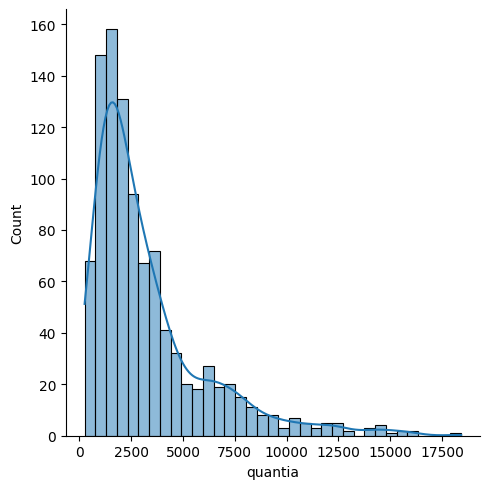

In [ ]:
# visualizando com grafico com uma linha de suavização
import seaborn as sns
sns.displot(df.quantia, kde=True);

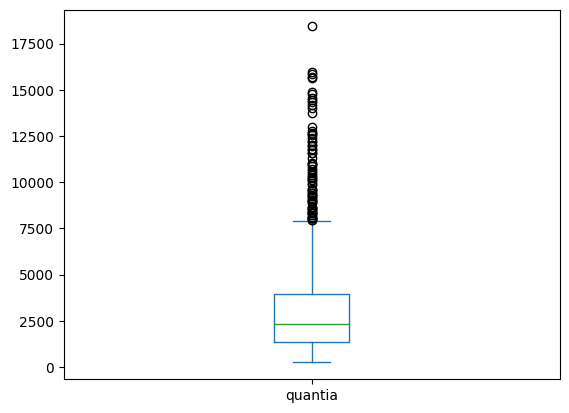

In [ ]:
#Verificação de outliers
df['quantia'].plot(kind='box');

In [ ]:
df[df['quantia'] > 7500].describe()

,duração,quantia,idade,dependentes
count,86.00000,86.000000,86.000000,86.000000
mean,37.44186,10416.872093,36.139535,1.162791
std,12.55445,2544.547743,10.899717,0.371340
min,6.00000,7511.000000,21.000000,1.000000
25%,30.00000,8322.250000,27.000000,1.000000
50%,36.00000,9600.500000,34.500000,1.000000
75%,48.00000,11983.000000,42.750000,1.000000
max,60.00000,18424.000000,68.000000,2.000000


*UTILIZAR RANDOM FOREST OU GRADIENT BOOSTING POIS OS OUTLIERS CORRESPONDEM A APROX. 9% DOS DADOS.*

In [ ]:
df.sample(5)

,conta,duração,historico,quantia,poupança,emprego,garantia,propriedades,idade,financiamentos,moradia,trabalho,dependentes,pagador
639,negativo,42,já atrasou pagamentos,4370,<100,"[4,7) anos",nenhum,seguro de vida,26,bancos,própria,nível 2,2,mau
293,200+,42,conta crítica,4796,<100,> 7 anos,nenhum,sem propriedades,56,nenhum,de graça,nível 2,1,bom
140,200+,6,pagamento em dia,709,>1000,< 1 ano,nenhum,imobiliario,27,nenhum,própria,desempregado,1,bom
457,negativo,12,pagamento em dia,3386,<100,> 7 anos,nenhum,sem propriedades,35,nenhum,de graça,nível 2,1,mau
188,negativo,12,pagamento em dia,674,[100-500),"[4,7) anos",nenhum,seguro de vida,20,nenhum,própria,nível 2,1,mau


In [ ]:
#df['conta'].value_counts()
#df['historico'].value_counts()
#df['poupança'].value_counts()
#df['emprego'].value_counts()
#df['garantia'].value_counts()
#df['propriedades'].value_counts()
#df['financiamentos'].value_counts()
#df['moradia'].value_counts()
#df['trabalho'].value_counts()
df['pagador'].value_counts()

bom    700
mau    300
Name: pagador, dtype: int64

In [ ]:
# Substituindo os valores da coluna 'conta'
df['conta']=df['conta'].replace('[0-200)','ate 200')
# Subst os valores da coluna 'poupança'
df['poupança'] = df['poupança'].replace(['<100','[100-500)','[500-1000)','>1000'],['ate 100','100 a mil','100 a mil','+1k'])
# Subs. a variavel alvo para booleano
df['pagador'] = df['pagador'].replace(['bom','mau'],[1,0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   conta           1000 non-null   object
 1   duração         1000 non-null   int64 
 2   historico       1000 non-null   object
 3   quantia         1000 non-null   int64 
 4   poupança        1000 non-null   object
 5   emprego         1000 non-null   object
 6   garantia        1000 non-null   object
 7   propriedades    1000 non-null   object
 8   idade           1000 non-null   int64 
 9   financiamentos  1000 non-null   object
 10  moradia         1000 non-null   object
 11  trabalho        1000 non-null   object
 12  dependentes     1000 non-null   int64 
 13  pagador         1000 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 109.5+ KB


In [ ]:
# Normalização Z (Padronização)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['duração','quantia','idade','dependentes']] = scaler.fit_transform(df[['duração','quantia','idade','dependentes']])

In [ ]:
# dummificação de variaveis
dt = pd.get_dummies(df, columns=['conta','historico','poupança','emprego','garantia','propriedades','financiamentos','moradia','trabalho'])

In [ ]:
dt.head()

,duração,quantia,idade,dependentes,pagador,conta_200+,conta_ate 200,conta_negativo,conta_sem conta,historico_conta crítica,...,financiamentos_bancos,financiamentos_lojas,financiamentos_nenhum,moradia_alugada,moradia_de graça,moradia_própria,trabalho_desempregado,trabalho_nível 1,trabalho_nível 2,trabalho_nível 3
0,-1.236478,-0.745131,2.766456,-0.428290,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
1,2.248194,0.949817,-1.191404,-0.428290,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,-0.738668,-0.416562,1.183312,2.334869,1,0,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0
3,1.750384,1.634247,0.831502,2.334869,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
4,0.256953,0.566664,1.535122,2.334869,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


### 4. MACHINE LEARNING

#### 4.1 RANDOM FOREST

In [ ]:
# separação de variáveis preditoras e variável resposta
y = dt['pagador']
# Remova a coluna 'Creditability' do DataFrame original
X = dt.drop('pagador', axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

modelo = RandomForestClassifier(n_estimators = 100, # nº de arvores
                                # max_features = 'auto', # qtde de nós que a arvore observa em um nó
                                bootstrap = True, # Na literatura essa aleatoriedade extra tende a gerar melhores resultados
                                max_depth = 7, # profundidade
                                min_samples_split = 20) # numero minimo de amostra num nó permitido, menos que isso ela para de dividir.

medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
print('Média da acurácia: ', round(medidas['test_score'].mean(), 4))

Média da acurácia:  0.749


#### 4.2 GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

# Crie um modelo Gradient Boosting
gradient_boosting = GradientBoostingClassifier(max_depth=7, n_estimators=50, max_leaf_nodes=15, min_samples_split=40)

# Realize a validação cruzada
scores = cross_val_score(gradient_boosting, X, y, cv=validacao, scoring='accuracy')

# Imprima as pontuações de validação cruzada
#print("Pontuações de validação cruzada:", scores)
print("Média da acurácia:", scores.mean().round(4))

Média da acurácia: 0.763


#### 4.3 TUNAGEM DE HIPERPARAMETROS DO GRADIENTE BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Defina uma grade de hiperparâmetros para pesquisa
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5],
              'learning_rate': [0.1, 0.01, 0.001]}

# Crie um modelo Gradient Boosting
gradient_boosting = GradientBoostingClassifier()

# Crie um objeto GridSearchCV
grid_search = GridSearchCV(gradient_boosting, param_grid, cv=validacao, scoring='accuracy')

# Realize a pesquisa de hiperparâmetros
grid_search.fit(X, y)

# Melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print(f'Melhores hiperparâmetros encontrados: {best_params}')

# Melhor desempenho
best_score = grid_search.best_score_
print(f'Melhor desempenho (acurácia): {best_score}')

Melhores hiperparâmetros encontrados: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Melhor desempenho (acurácia): 0.7626666666666666


#### 4.4 Parametros do Modelo Gradiente (sem tunagem)

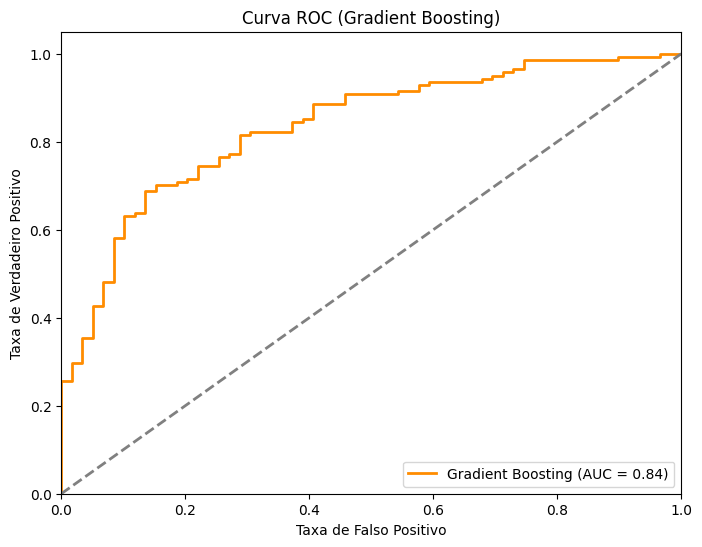

In [ ]:
# Curva ROC para o Gradiente
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie um modelo Gradient Boosting
gradient_boosting = GradientBoostingClassifier()

# Treine o modelo nos dados de treinamento
gradient_boosting.fit(X_train, y_train)

# Obtenha as probabilidades previstas para a classe positiva
y_prob_gb = gradient_boosting.predict_proba(X_test)[:, 1]

# Calcule a curva ROC
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plote a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC (Gradient Boosting)')
plt.legend(loc='lower right')
plt.show()

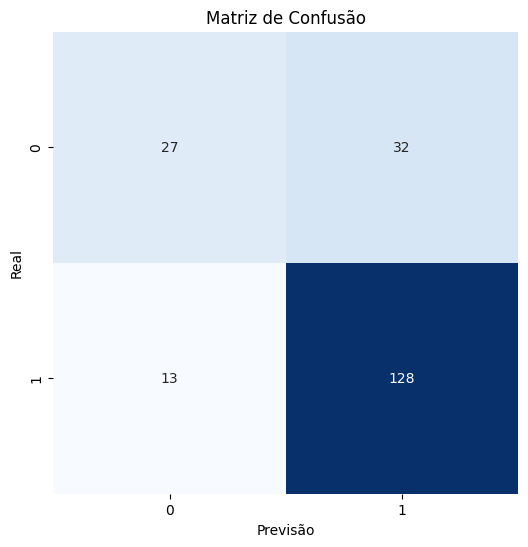

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Treine seu modelo Gradient Boosting
gradient_boosting.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = gradient_boosting.predict(X_test)

# Crie a matriz de confusão
confusion = confusion_matrix(y_test, y_pred)

# Plote a matriz de confusão
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

### 5. PREPARO DO MODELO SELECIONADO (Gradiente)

*OBS: separei apenas algumas variaveis para ser possível um simples deploy online*

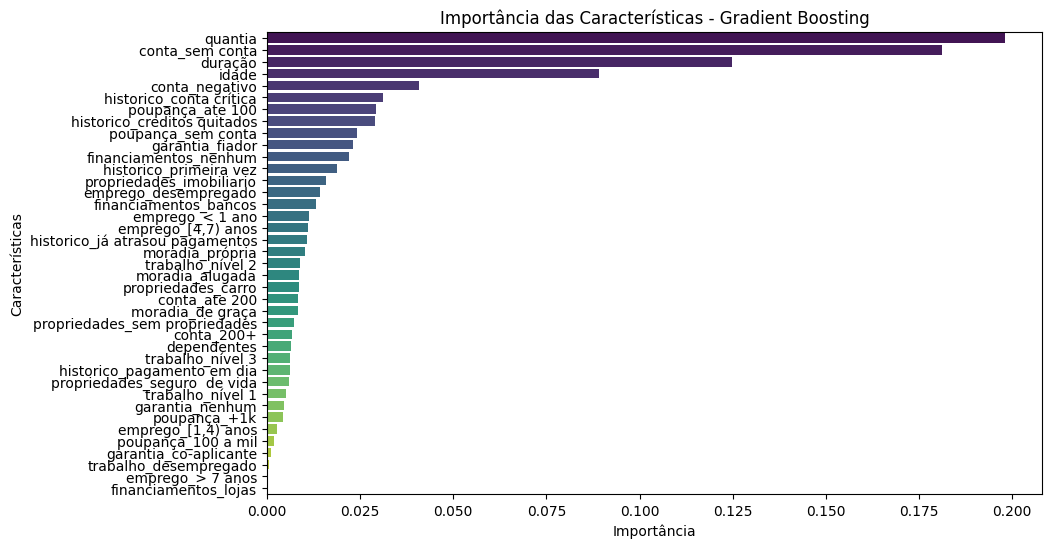

In [ ]:
# Criar e treinar o modelo de Gradient Boosting
#modelo_gb = GradientBoostingClassifier()
gradient_boosting.fit(X,y)

# Acessar a importância das características
importancia_caracteristicas = gradient_boosting.feature_importances_

# Criar um DataFrame para visualizar a importância das características
df_importancia = pd.DataFrame({'Feature': X_train.columns, 'Importance': importancia_caracteristicas})
df_importancia = df_importancia.sort_values(by='Importance', ascending=False)

# Criar um gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importancia, palette='viridis')
plt.title('Importância das Características - Gradient Boosting')
plt.xlabel('Importância')
plt.ylabel('Características')
plt.show()

In [ ]:
df.sample(3)

,conta,duração,historico,quantia,poupança,emprego,garantia,propriedades,idade,financiamentos,moradia,trabalho,dependentes,pagador
175,sem conta,0.754763,creditos quitados,1.493533,sem conta,desempregado,nenhum,imobiliario,1.535122,bancos,própria,nível 3,-0.42829,0
758,sem conta,0.256953,pagamento em dia,-0.665736,ate 100,"[1,4) anos",fiador,imobiliario,-0.399832,nenhum,própria,nível 2,-0.42829,1
365,sem conta,-0.738668,pagamento em dia,-0.612924,ate 100,"[4,7) anos",nenhum,carro,0.039930,nenhum,própria,nível 2,-0.42829,1


In [ ]:
# Selecionando variaveis para treino/testes
dft = df[['quantia', 'conta', 'duração','idade','historico', 'pagador']]

In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   quantia    1000 non-null   float64
 1   conta      1000 non-null   object 
 2   duração    1000 non-null   float64
 3   idade      1000 non-null   float64
 4   historico  1000 non-null   object 
 5   pagador    1000 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 47.0+ KB


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import joblib

# Seus dados e variáveis
X = dft[['quantia', 'conta', 'duração','idade','historico']]
y = dft['pagador']

# Criando transformações
numeric_features = ['quantia','duração', 'idade']
categorical_features = ['conta','historico']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])
# Criando o modelo (Tunado)
#modelo_boosting = GradientBoostingClassifier(max_depth=3, n_estimators=300, max_leaf_nodes=15, min_samples_split=40, learning_rate=0.1)

# Criando o modelo Gradiente Boosting
modelo = GradientBoostingClassifier()

# Criando o pipeline completo
pipeline_boosting = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', modelo)])
# Treinando o modelo com todos os dados
pipeline_boosting.fit(X, y)
# Salvando o modelo em um arquivo pkl
joblib.dump(pipeline_boosting, 'modelo.pkl')

['modelo.pkl']

### 6. TESTE COM NOVOS DADOS

In [ ]:
dft.sample(1)

,quantia,conta,duração,idade,historico,pagador
178,-0.463703,sem conta,-0.738668,-0.399832,pagamento em dia,1


In [ ]:
# Criando um novo DataFrame para novos dados
nvds = pd.DataFrame(columns=['quantia',	'conta',	'duração',	'idade',	'historico'])
nvds.loc[0, 'quantia'] = 125
nvds.loc[0, 'conta'] = 'sem conta'
nvds.loc[0, 'duração'] = 24
nvds.loc[0, 'idade'] = 50
nvds.loc[0, 'historico'] = 'pagamento em dia'
#nvds.astype(float)

In [ ]:
previsao_novos_dados = pipeline_boosting.predict(nvds)
#print(f'Previsão para novos dados: {previsao_novos_dados[0]}')

if previsao_novos_dados == 0:
  print('Não aprovar novo crédito')
else:
  print('Aprovar')

Aprovar


In [ ]:
!pip list
  #!pip install streamlit